# Einfaches CNN mit den ersten generierten Bildern

Anleitung hier: <br>
https://www.tensorflow.org/tutorials/load_data/images <br>
https://www.tensorflow.org/tutorials/images/classification

CNN Regression: <br>
https://www.youtube.com/watch?v=9AnCNBL8c6Q <br>
https://www.youtube.com/watch?v=nU_T2PPigUQ

In [19]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
# import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential


In [20]:
print(tf.__version__)

2.7.0


In [3]:
# 391 × 348 Dimension der Bilder

# Vorgehen Daten Analyse

Subfolder pro Klasse.
Beispiel : <br>
Klasse1 <br>
&nbsp;&nbsp;    |__ pic1 <br>
&nbsp;&nbsp;    |__ pic2 <br>
Klasse2 <br>
&nbsp;&nbsp;    |__ pic1 <br>
&nbsp;&nbsp;    |__ pic2 <br>

In [21]:
img_height = 128
img_width = 128
batch_size = 32

model = keras.Sequential(
    [
        layers.Input((128, 128, 1)),
        layers.Conv2D(16, 3, padding="same"),
        layers.Conv2D(32, 3, padding="same"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(10),
    ]
)

In [22]:
# training data laden
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/rene-/Git/dfDeepDL/data/simple_set",
    labels="inferred",
    label_mode="int",  # categorical, binary
    # class_names=['0', '1', '2', '3', ...]
    # class_names = ['-0.5', '-0.375', '-0.25', '-0.125', '0', '0.125', '0.25', '0.375', '0.5' ],
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="training",
)

Found 900 files belonging to 9 classes.
Using 810 files for training.


In [23]:
# validatoion data laden
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/rene-/Git/dfDeepDL/data/simple_set",
    labels="inferred",
    label_mode="int",  # categorical, binary
    # class_names=['0', '1', '2', '3', ...]
    #class_names = ['-0.5', '-0.375', '-0.25', '-0.125', '0', '0.125', '0.25', '0.375', '0.5' ]
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="validation",
)

Found 900 files belonging to 9 classes.
Using 90 files for validation.


In [24]:
class_names = train_ds.class_names
print(class_names)

['-0.125', '-0.25', '-0.375', '-0.5', '0', '0.125', '0.25', '0.375', '0.5']


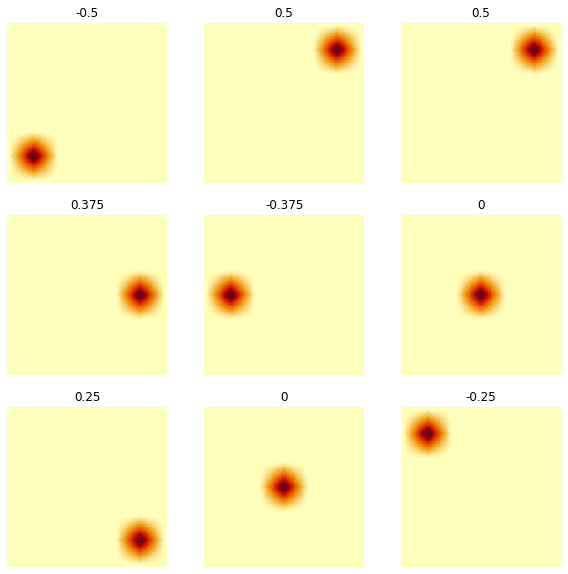

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [26]:
def augment(x, y):
    image = tf.image.random_brightness(x, max_delta=0.05)
    return image, y

In [27]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [28]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [29]:
train_ds.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [30]:
normalization_layer = layers.Rescaling(1./255)

In [31]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [35]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1)
])

In [16]:
# model.compile(
#   optimizer='adam',
#   loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
#   metrics=['accuracy'])

In [36]:
model.compile(
  optimizer='adam',
  loss=tf.losses.MeanSquaredError(),
  metrics=['accuracy'])

In [37]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
26/26 [==============================] - 1s 17ms/step - loss: 3.0129 - accuracy: 0.1370 - val_loss: 0.0506 - val_accuracy: 0.2444
Epoch 2/10
26/26 [==============================] - 0s 10ms/step - loss: 0.0612 - accuracy: 0.2123 - val_loss: 0.0368 - val_accuracy: 0.2444
Epoch 3/10
26/26 [==============================] - 0s 9ms/step - loss: 0.0088 - accuracy: 0.2198 - val_loss: 0.0035 - val_accuracy: 0.2444
Epoch 4/10
26/26 [==============================] - 0s 9ms/step - loss: 0.0017 - accuracy: 0.2198 - val_loss: 2.9062e-04 - val_accuracy: 0.2444
Epoch 5/10
26/26 [==============================] - 0s 9ms/step - loss: 7.1280e-05 - accuracy: 0.2198 - val_loss: 1.1420e-05 - val_accuracy: 0.2444
Epoch 6/10
26/26 [==============================] - 0s 10ms/step - loss: 1.4563e-05 - accuracy: 0.2198 - val_loss: 2.2558e-06 - val_accuracy: 0.2444
Epoch 7/10
26/26 [==============================] - 0s 9ms/step - loss: 2.6280e-06 - accuracy: 0.2198 - val_loss: 6.1319e-07 - val_accura